Vitber prosjekt Oppgave 1

I dette prosjektet skal vi se på diffusjon av vannmolekyler i friskt og kreftsykt vev, som en intro til moderne MRI -scan.  Diffusjon er tilfeldig virrevandring av partikler grunnet konsentrasjonsforskjeller i materialet. Altså vil $H_2O$ molekyler diffundere fra ett område med høy konsentrasjon til ett område der det er en lavere konsentrasjon av $H_2O$. Det viser seg at denne diffusjonen kan beskrives i én dimensjon av en funskjon $\varphi(x,t)$ som må oppfylle diffusjonsligningen:
$$
\frac{\partial \varphi(x,t)}{\partial t}
   = D \frac{\partial^2 \varphi(x,t) }{\partial x^2}, 
$$
der diffusjonskonstanten D er gitt ved 
$$
D = \frac{ (\Delta x)^2}{2\Delta t}
$$

En vanlig praksis i numeriske modeller er å se på dimensjonsløse størrelser. Dette gjør at man lettere kan plotte, regne med koden og sikrer at man får tall som ikke er for store til å bli representert av binær kode. Dermed har man valgt å sette endringen i x-retning og tiden begge til å være lik $1$, $\Delta x = \Delta t = 1$, slik at $D = \frac{1}{2}$. Hvis $\varphi(x,t)$ er lik sannsynlighetsfordelingen til en normalfordelt stokastisk variabel med forventningsverdi $\mu = 0$ og varians $\sigma^2 = at$, der $a$ er en konstant, har man uttrykket:
$$
\varphi(x,t) = \frac{1}{\sqrt {2 \pi at}} e^{\tfrac{-x^2}{2 at}}.
$$

Hvis man velger $a$ riktig viser det seg at $\varphi(x,t)$ oppfyller diffusjonslikningen. Man har da at:
$$ 
\frac{\partial \varphi(x,t)}{\partial t} = \frac{1}{2t\sqrt{2 \pi at} }\left( \frac{x^2}{at}-1\right) 
e^{\frac{-x^2}{2 at}}= \frac{1}{2at\sqrt {2\pi at}} \left( \frac{x^2}{at}-1\right)e^{\frac{-x^2}{2 at}}
= D \frac{\partial^2 \varphi(x,t)}{\partial^2 x},
$$ 

ser øyeblikket at $a = 1$ er en løsning samt når $\frac{x^2}{at}-1 = 0  \Rightarrow a = \frac{x^2}{t}$. Så hvis $\varphi(x,t)$ er sannsynlighetstettheten til en normalfordeling med forventningsverdi $\mu = 0$ 
og varians $\sigma^2 = t$ eller $\sigma^2 = x^2$ er diffusjonsligningen oppfylt. Hvis variansen $\sigma^2 = x^2$ vil 
funksjonen bli uavhengig av tiden, noe som man vet ikke vil stemme med virkeligheten, dermed velger man å se bort i fra denne løsningen og $a=1 \Rightarrow \sigma^2 = t$ blir eneste fornuftige løsning.

For å kunne teste diffusjonsligningen i menneskevev begynner man først med å se på en partikkel som kan bevege seg tilfeldig retning i én dimensjon. Dette kan man fremstillet numerisk ved å genrere tilfeldige tall som bestemmer hvor en partikkel skal bevege seg.


In [2]:
#Importerer nødvendige biblioteker
import numpy as np 
import matplotlib.pyplot as plt
import numpy.random as random 
import scipy.optimize as optimize

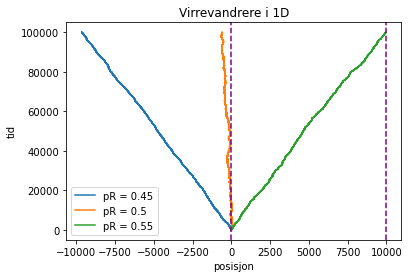

In [3]:
#Oppgave 1b) og 1c)
def virrevandrer(M,pR):
    tid = np.linspace(0, M-1, M)                    #Lager tidsarray fra 0 til M-1, med M punkter
    posisjon = np.zeros(M)                          #Lager ett array med posisjon
    tilfeldigeTall  = np.random.uniform(0, 1,M-1)   #Lager (M-1) tilfeldige tall mellom 0 og 1
    for i in range(1, M):                           #Løkke med (M-1) kjøringer
        if tilfeldigeTall[i-1] < pR:                #Sjekker om tallet er mindre enn sannsynlighet for å gå til høyre
            posisjon[i] = posisjon[i-1] + 1         #Går til høyre
        else:
            posisjon[i] = posisjon[i-1] - 1         #Går til venstre
    return posisjon, tid

prob = [0.45, 0.5, 0.55]                            #Liste med sannsynlighetene foer å gå til høyre
for i in range(len(prob)):
    pos, time = virrevandrer(100000, prob[i]); plt.plot(pos, time, label = f'pR = {prob[i]}') #Plotter for alle sanns.
plt.axvline(x=0, linestyle = '--', color = "purple") #Lager en midtlinje i x=0 for bedre visualisering
plt.axvline(x=10000, linestyle = '--', color = "purple")
plt.legend()
plt.xlabel("posisjon")
plt.ylabel("tid")
plt.title("Virrevandrere i 1D")
plt.show()

I plottet ovenfor har man virrevandring for tre partikler. Vi har plottet 100000 punkter for hver partikkel slik at simuleringene skal bli så representative som mulig for sannsynlighetene. Ser tydelig at når sannsynligheten for å gå mot høyre er $pR = 0.45$ vil partikkelen helt tydelig vike mot venstre, likedan ser man på motsatt side der $pR = 0.55$. Når $pR = 0.50$ vil partikkelen ligge rundt $x = 0$ hele veien, men kan avvike noe pga. tilfeldigheter. Når $pR = 0.55$ vil man forvente at partikkelen vil gå mot høyre $55\%$ av gangene og $45\%$ av gangene mot venstre. Man vil da forvente en totalt sannsynlighet for å gå til høyre på $10\%$ i forhold til når tiden øker med $1$ oppover. Altså kan man forvente en stigningstall $a = \frac{\Delta y}{\Delta x} = 10$. Dette ser man stemmer godt med plottet som ender omtrent i punktet $(10000, 100000)$ og har konstant stigning.


For å se hvordan dette skjer i stor skala kan man se på mange virrevandrere samtidig, vist i kodeblokken under.

728 ms ± 61.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


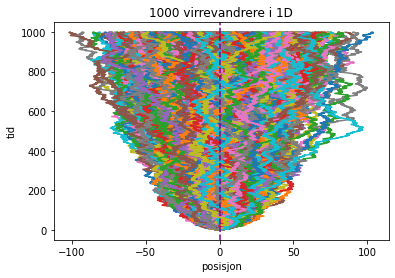

In [4]:
def multi_virrevandrer(N,M,pR, plot = False):
    A = np.zeros((N, M))
    for i in range(N):
        pos, time = virrevandrer(M, pR)
        A[i] = pos #Legger posisjonene inn i matrisen A
        if(plot == True):
            plt.plot(pos, time) #Plotter alle posisjonene
    if(plot == True):
        plt.axvline(x=0, linestyle = '--', color = "purple") #Lager en midtlinje i x=0 for bedre visualisering
        plt.xlabel("posisjon")
        plt.ylabel("tid")
        plt.title(f"{N} virrevandrere i 1D")
        plt.show()
    #return A, time

%timeit multi_virrevandrer(1000, 1000, 0.5, False) #Tar tiden på koden
multi_virrevandrer(1000, 1000, 0.5,True) #Plotter


Her ser man 1000 virrevandrere som er plottet for 1000 tidssteg, med lik sannsynlighet for å gå mot venstre og høyre. I plottet ser man at mange av virrevandrerne avviker ganske kraftig fra $x = 0$ som tyder på at $1000$ steg er litt for lite. 

29.7 ms ± 704 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


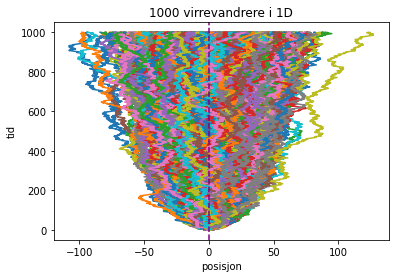

In [5]:
#Oppgave 1e)
def multi_virrevandrer2(N, M, pR = 1/2, plot = False):
    pos = random.choice([-1,1], size = (N,M), p = [pR, 1 - pR]) #lager en matrise med -1 og 1 med størrelse N*M og p = pR
    time = np.linspace(0, M, M) #tid
    for i in range(N): #plottene 
        pos[i] =np.cumsum(pos[i])
        if(plot == True):
            plt.plot(pos[i], time)
    if(plot == True):
        plt.axvline(x=0, linestyle = '--', color = "purple") #Lager en midtlinje i x=0 for bedre visualisering
        plt.xlabel("posisjon")
        plt.ylabel("tid")
        plt.title(f"{N} virrevandrere i 1D")
        plt.show()
    return pos, time
%timeit pos, time = multi_virrevandrer2(1000,1000, 0.5, False) #Tar tiden på koden
pos, time = multi_virrevandrer2(1000,1000, 0.5, True)

Oppgave 1e


Grunnen til at koden er raskere er bruken av 'random.choice'-funksjonen og 'np.cumsum'. Disse funksjonene lager en matrise med kun -1 og 1 med en gitt sannsynlighet for hver av verdiene og så gir kumulativ sum av verdiene. De importerte funksjonene er skrevet i C, C++ eller Fortran som er "datamaskin nære" språk som gjør at funksjonene er mer effektive enn koden vi har konstrusert selv. Koden vi har skrevet over gjør de samme beregningene, men er skrevet i et språk(Python) som er mye lenger unna selve datamaskinlogikken og må gjennom flere prosesser for å få samme resultat. Vi har tatt tiden for kode der vi ikke plotter resultatene. Plottingen av funksjonene vil ta like lang tid i begge kodene siden vi uansett jobber med arrayer. Det viser seg at funksjonen der vi har 'random.choice' og 'np.cumsum' blir koden opp til 20 ganger raskere.

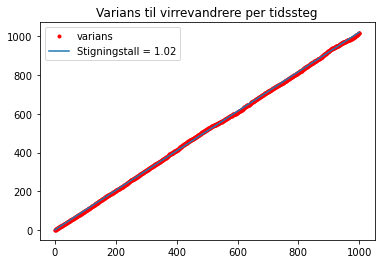

In [6]:
def linear_func(x, a, b): #lineær funksjon som må brukes i optimize.curvefit 
    return a*x + b 

def varians(N,M, pR, plot = False):
    pos, time = multi_virrevandrer2(N,M, pR, plot) #henter ut posisjon og tid for N virrevandrere med M tidssteg
    posT = pos.T #transponerer posisjonsmatrisen for å enklere hente ut posisjonen til alle virrevandrere for gitt tidssteg 
    var = np.zeros(len(posT)) #lager en array for variansen til virrevandrerne 
    for i in range(len(posT)): #beregner variansen til virrevandrerne i hvert tidssteg
        var[i] = np.var(posT[i]) 

    popt, pcov = optimize.curve_fit(linear_func, time, var) #bruker curvefit for å hente ut nædvendige konstanter 
    fitted_curve = linear_func(time, *popt)#henter ut endelig lineær funksjon 
    Stigningstall = (fitted_curve[-1] - fitted_curve[0])/(time[-1] - time[0]) #beregner stigningstall 
    #Plotter
    plt.figure()
    plt.title(f'Varians til virrevandrere per tidssteg')
    plt.plot(time, var, '.r', label = 'varians')
    plt.plot(time, fitted_curve, label = f"Stigningstall = {np.round(Stigningstall,3)}")
    plt.legend()
    plt.show()

varians(10000,1000, 0.5)

Oppgave 1f \
Vi observerer at den empiriske variansen øker over tid. Dette passer godt med antakelsen gjort i oppgave 1a der $\sigma^2 = at$. Konsekvensen av at variansen øker over tid  er at virrevandrernes posisjon vil bli mer spredt. Vi ser også at 'optimize.curve_fit' passer godt med den empiriske variansen. Hvis vi øker antallet virrevandrere, N, vil vi få sterkere samsvar mellom den analytiske funksjonen og de empirisk beregnede variansen. Dette skyldes at variansen beregnes i forhold til antall virrevandrere som er med i simuleringene. Empirisk varians er definert slik 

$$\sigma \approx S_N^2 = \frac{1}{N-1}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 }$$
    
Her representerer $x_i$ en virrevandrer sin posisjon og $\bar x$ representerer gjennomsnittlig posisjon av virrevandrerne. Og når N blir søtte blir variansen mer presis. Antall tidsteg vil ikke være like viktige i beregningen av stignignstallet eller variansen, antall virrevandrere er mer kritisk. Simuleringene vi har gjort gir stingningstall som ligger rundt a = 1 som igjen passer utmerket godt det analytiske arbeidet gjort i 1a. 

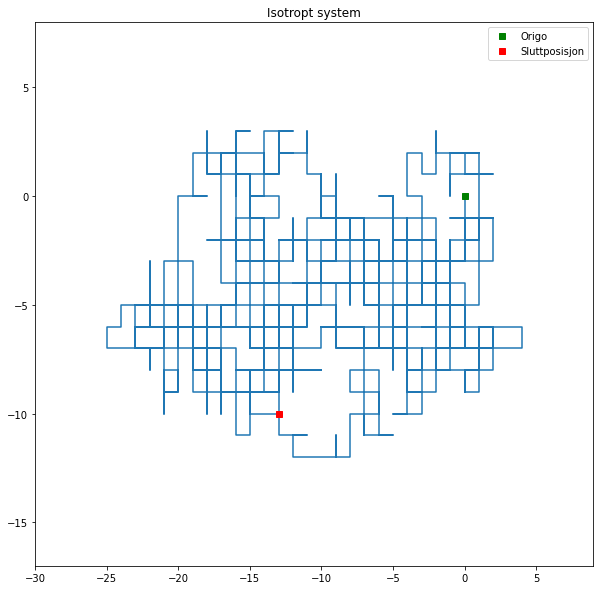

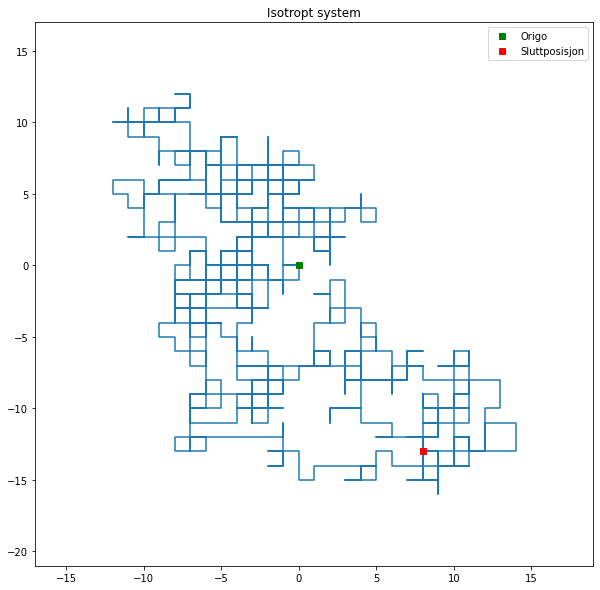

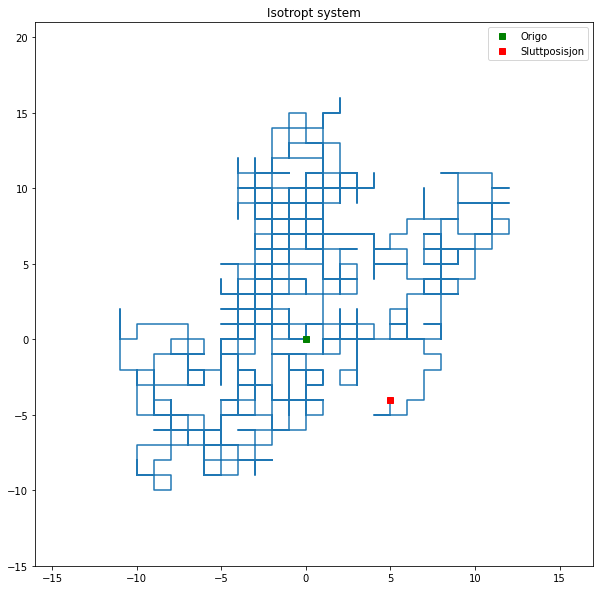

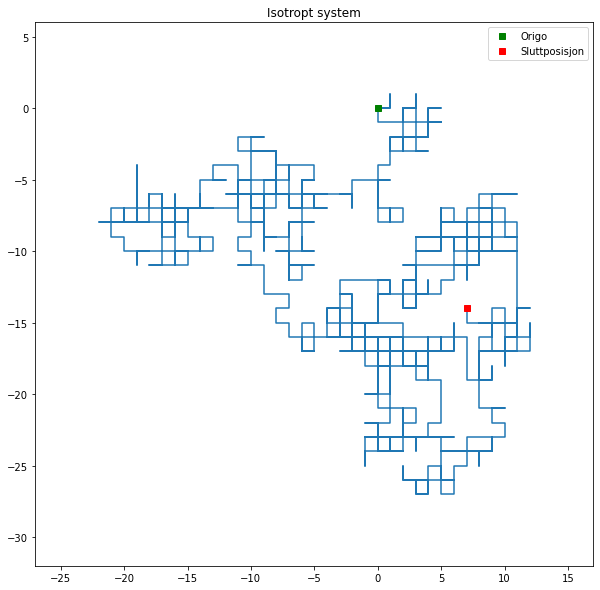

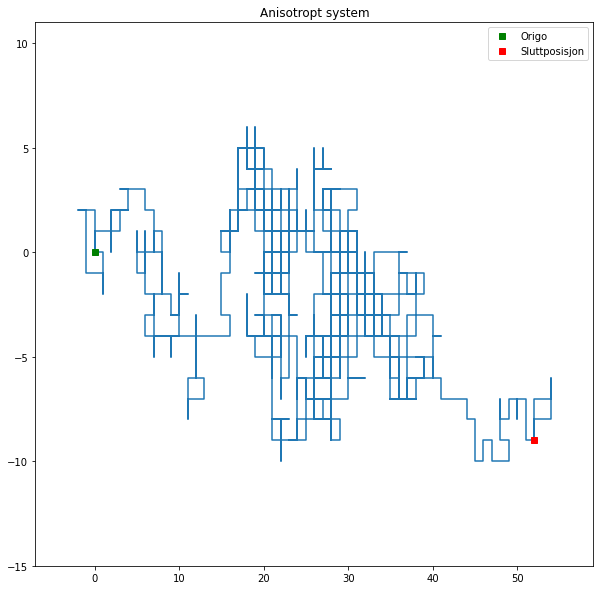

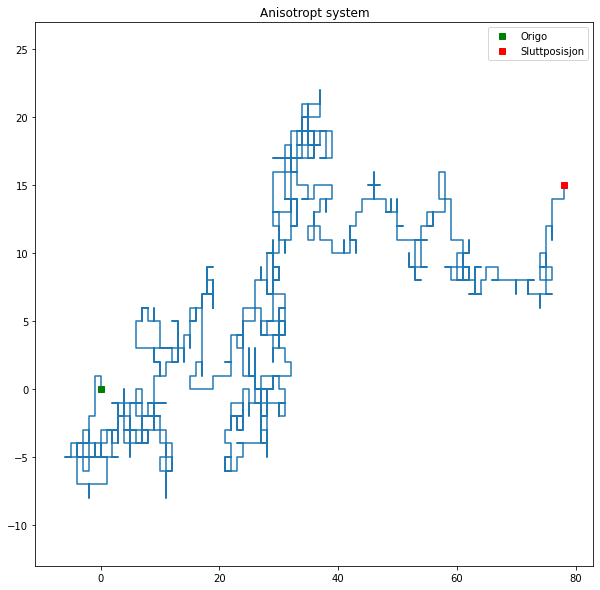

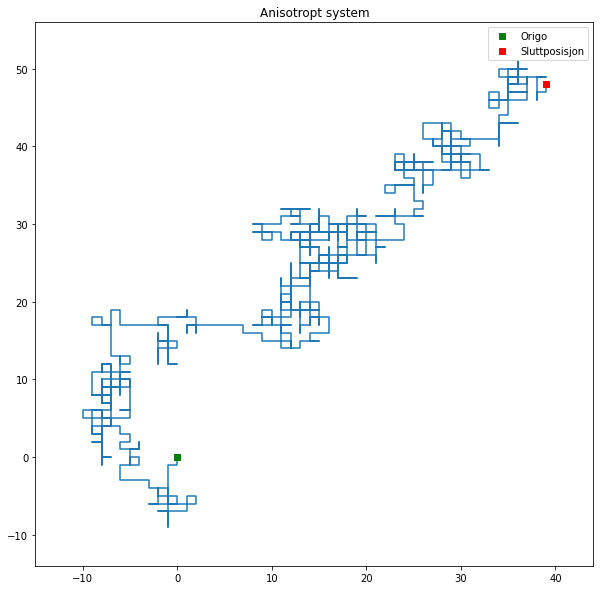

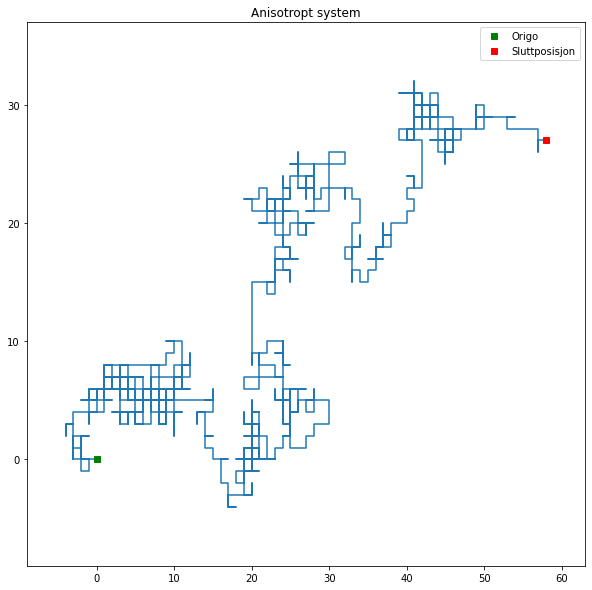

In [7]:
#Tar inn M tidssteg, pR = sannsynlighet for å gå til høyre og pU er sannsynligheten for å gå opp
def multi_dim_virrevandrer(M, pR = 1/2, pU = 1/2, plot = False):
    vertical = np.zeros(M) #Lager array med 0-ere for y-koordinater, som fylles opp med tilfeldige tall
    horisontal = np.zeros(M)  #Lager array med 0-ere for x-koordinater, som fylles opp med tilfeldige tall
    tilfeldig_bevegelse_retning = random.uniform(0,1,M) #Bestemmer vertikal eller horisontal bevegelse
    tilfeldig_positiv_negativ_bevegelse = random.uniform(0,1,M) #Bestemmer positiv eller negativ bevegelse i gitt retning
    for i in range(1,M):
        if tilfeldig_bevegelse_retning[i] < 0.5: #Hvis tilfeldig_bevegelse_retning er mindre enn 0.5 beveger vi oss vertikalt
            if tilfeldig_positiv_negativ_bevegelse[i] < pU:
                vertical[i] = vertical[i-1] + 1 #Hvis tilfeldig_positiv_negativ_bevegelse er mindre en pU vil vi gå oppover
                horisontal[i] = horisontal[i-1] #Horisontalt skal bevegelsen ikke endre seg
            else:
                vertical[i] = vertical[i-1] - 1 #Ellers skal man da gå nedover
                horisontal[i] = horisontal[i-1] #Horisontalt skal bevegelsen ikke endre seg
        else: 
            #Hvis tilfeldig_bevegelse_retning er større enn 0.5 beveger vi oss horisontalt
            #Hvis tilfeldig_positiv_negativ_bevegelse er mindre enn pR går man til høyre
            if tilfeldig_positiv_negativ_bevegelse[i] < pR: 
                horisontal[i] = horisontal[i-1] + 1 #Går mot høyre
                vertical[i] = vertical[i-1]  #Ingen endring 
            else:
                horisontal[i] = horisontal[i-1] - 1 
                vertical[i] = vertical[i-1]
    width = 0 
    height = 0 
    
    #Plotter
    if(plot == True):
        plt.axis([horisontal.min() - 5, horisontal.max() + 5, vertical.min() - 5, vertical.max() + 5])
        plt.plot(horisontal, vertical)
        plt.plot(0,0, 'sg', label = 'Origo')
        plt.plot(horisontal[-1], vertical[-1], 'sr', label = 'Sluttposisjon')
        plt.legend()
        plt.show()
    return horisontal, vertical

#Plotter for 
for i in range(4):plt.figure(figsize = (10,10)); plt.title(f'Isotropt system'); multi_dim_virrevandrer(1000, 0.5, 0.5,True)

for i in range(4):plt.figure(figsize = (10,10)); plt.title(f'Anisotropt system'); multi_dim_virrevandrer(1000, 0.55, 0.55,True)
            


oppgave 1g\
Vi ser fra resultatene at virrevandrerne i det isotrope systemet beveger seg mer tilfeldig og ender sjeldent opp på samme sted. Kan ende opp i alle fire delene av koordinatsystemet. Virrevandrerne danner et grid der den har gått og virker ikke som at den har en foretrukket retning å gå. I det anisotropet systemet ser vi tydeligere at virrevandreren "ønsker" å gå i en bestemt retning. Det er definitivt mulig å se anisotropien i plottet. For hvert av plottene ender virrevandreren i høyre øvre hjørnet av koordinatsystemet når vi setter $pR = pU = 0.55$.

In [8]:
#Oppgave 1h) Kanskje skrives for tekst

Oppgave 1i) Vi ser ut i fra plottene under at n(t) konvergerer mye raskere mot 1 i en dimensjon enn i to dimensjoner. Dette skyldes nok at virrevandreren har mye større frihet til å bevege seg i ulike retninger og vi trenger størrre verdier for M for at alle virrevandrene skal returne til origo. Vi valgte N=100 og M=2000 for å få unngå for stor kjøretid. Vi valgte M som det sørste av de for å komme så nærme t= $\infty$ som mulig. Det som gjør at koden blir treig er plottingen av n(t) mot t, da må vi simuere N virrevandrere M ganger og plotte de, dette tar lang tid. Det er størrelsen på M som dominerer utfallet av kjøretiden. Siden vi må plotte for alle verdier av M vil kjøretiden bli betraktelig større for verdier der M er større enn N. Hvis vi ikke hadde plottet hadde kjøretiden blitt mye raskere siden plotting tar mye tid, men da mister vi visualiseringen av veksten til n(t) over tid. 

In [96]:
#Oppgave 1i)
def n_1D(N,M): #n(t) når i en-dimensjon
    n = 0 
    pos, time = multi_virrevandrer2(N, M) #henter posisjon og tid for virrevandrerne 
    for i in range(N): #sjekker for alle virrevandrere
        if(len(pos[i][1:]) - np.count_nonzero(pos[i][1:]) > 0): #tester hver av virrevandrerne om de returnerer til origo,
            #hvis lengden av posisjonsarrayet(utenom start posisjon) minus antall verdier som ikke er null er større enn 0 vil virrevandreren returnere til origo
            n +=1
    return n/N;

def n_2D(N,M):
    n = 0
    for i in range(N): #kjører for N virrevandrere 
        horisontal, vertical = multi_dim_virrevandrer(M) #lager virrevandrer med M stef 
        for j in range(1, M): #går gjennom alle verdiene i virrevandrer 
            if(horisontal[j] == 0 and vertical[j] == 0): #if test som sjekker om den er tilbake i origo
                n +=1
                break #brekker j-for loopen for å gå videre til neste virrevandrer 
    return n/N;

def plot_n_1D(N,M):
    time = np.arange(M) #lager array for tiden 
    antall_n = np.zeros(M) #array for n(t)
    for i in range(M):
        antall_n[i] = n_1D(N, i) #beregner antall n(t) i hvert tidsteg 
    plt.figure(figsize = (10,10)) 
    plt.title(f'n(t) for {N} virrevandrere og {M} tidssteg i 1 dimensjon')
    plt.plot(time, antall_n) #plotter n(t) mot t 
    plt.show()

def plot_n_2D(N,M):
    time = np.arange(M) #lager array for tiden
    antall_n = np.zeros(M) #array for n(t)
    for i in range(M):
        antall_n[i] = n_2D(N,i) #beregner antall n(t) i hvert tidssteg 
    plt.figure(figsize = (10,10))
    plt.title(f'n(t) for {N} virrevandrere og {M} tidssteg i to dimensjoner')
    plt.plot(time, antall_n) #plotter n(t) mot t 
    plt.show()

#print(n_1D(1000,1000))
#print(n_2D(1000,1000))
plot_n_1D(1000,100)
plot_n_2D(1000,100)


0.963
0.676


Vitber prosjekt Oppgave 2

In [10]:
delta_x=0.004
delta_t=0.01


#Definerer konstanter som brukes til å lage argumenetene
L=0.02
Antall_tumorer=15
Oppløsning=100
Areal=delta_x**2*np.pi
Tumor_konstant=0.1

#Lager en funksjon som generer to arrayer med x og y koordinater
def generate_koordinates(min_x,maks_x,min_y,maks_y,m):
    x=np.random.uniform(min_x,maks_x,m)
    y=np.random.uniform(min_y,maks_y,m)
    return x,y

x = np.linspace(0,L,Oppløsning)
y = np.linspace(0,L,Oppløsning)

x_pos, y_pos = generate_koordinates(0,L,0,L,Antall_tumorer)
kordinater_tumor_sentrum = [x_pos,y_pos]

In [11]:
#Selve funksjonen som besvarer oppgave 2 b)
#Funksjonen tar inn 2 arrayer med x og y koordinater, arealet til tumorne, 
#koordinatene til sentrum til tumorne og tumorkonstanten.
#Listen med koordinatene til sentrum tas inn som en 2D liste 2 arrayer. 
# 1. array tar inn x-koordinater, 2. array tar inn y-koordinater.

def lag_bilde_av_tumor(x_kordinater,y_kordinater,Areal,Antall_tumorer,koordinater_tumor_sentrum,tumor_konstant):

    #Finner radiusen til tumorne 
    radius_tumor=np.sqrt(Areal/np.pi)

    #Lager en NxN matrise som tar viser d_x i hvert punkt. 
    Oppløsning=len(x)
    koordinat_system=np.full([Oppløsning,Oppløsning],delta_x,dtype=float)
    
    xx,yy=np.meshgrid(x_kordinater,y_kordinater)

    #Finner alle verdiene som er innenfor tumorene
    for i in range(Antall_tumorer):
        innsiden_av_tumor=np.sqrt((xx-koordinater_tumor_sentrum[0][i])**2+(yy-koordinater_tumor_sentrum[1][i])**2)
        #Hvis partiklen er innenfor tumoren skal verdien delta_x ganges med roten av t_k
        koordinat_system *= np.where(innsiden_av_tumor <=radius_tumor,np.sqrt(tumor_konstant),1)

    plt.pcolormesh(xx,yy,koordinat_system)
    plt.colorbar( label = "steglengde for virrevandrer")
    plt.xlabel("x-verdier")
    plt.ylabel("y-verdier")
    plt.title("Tumorer")
    plt.show()


lag_bilde_av_tumor(x,y,Areal,Antall_tumorer,koordinater_tumor_sentrum,Tumor_konstant)

NameError: name 'koordinater_tumor_sentrum' is not defined

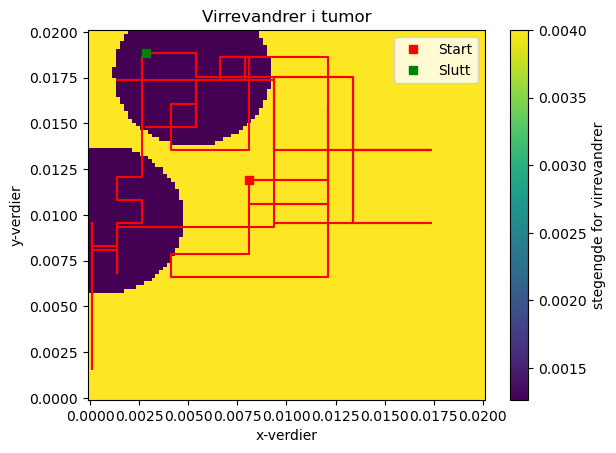

(array([0.00810726, 0.01210726, 0.01210726, 0.01210726, 0.00810726,
        0.00810726, 0.00410726, 0.00410726, 0.00810726, 0.01210726,
        0.01210726, 0.00810726, 0.01210726, 0.01210726, 0.01210726,
        0.00810726, 0.00810726, 0.00810726, 0.00684235, 0.00810726,
        0.00810726, 0.00684235, 0.00810726, 0.00937217, 0.00937217,
        0.00937217, 0.00537217, 0.00137217, 0.00137217, 0.00137217,
        0.00137217, 0.00137217, 0.00137217, 0.00010726, 0.00137217,
        0.00137217, 0.00137217, 0.00010726, 0.00010726, 0.00010726,
        0.00010726, 0.00010726, 0.00010726, 0.00010726, 0.00137217,
        0.00137217, 0.00263708, 0.00263708, 0.00137217, 0.00137217,
        0.00263708, 0.00263708, 0.00263708, 0.00263708, 0.00263708,
        0.00137217, 0.00537217, 0.00663708, 0.00663708, 0.00790199,
        0.00790199, 0.00663708, 0.00537217, 0.00537217, 0.00537217,
        0.00410726, 0.00284235, 0.00410726, 0.00537217, 0.00537217,
        0.00410726, 0.00410726, 0.00410726, 0.00

In [ ]:
def Virrevandrer_i_tumor(x_kordinater,y_kordinater,Areal,Antall_tumorer,koordinater_tumor_sentrum,tumor_konstant,M_steg, plot = False):

    #Finner radiusen til tumorne 
    radius_tumor=np.sqrt(Areal/np.pi)

    #Lager en NxN matrise som tar viser d_x i hvert punkt. 
    Oppløsning=len(x)
    koordinat_system=np.full([Oppløsning,Oppløsning],delta_x,dtype=float)
    
    xx,yy=np.meshgrid(x_kordinater,y_kordinater)

    for i in range(Antall_tumorer):
        innsiden_av_tumor=np.sqrt((xx-koordinater_tumor_sentrum[0][i])**2+(yy-koordinater_tumor_sentrum[1][i])**2)
        #Hvis partiklen er innenfor tumoren skal verdien delta_x ganges med roten av t_k
        koordinat_system *= np.where(innsiden_av_tumor <=radius_tumor,np.sqrt(tumor_konstant),1)
    antall_steg = M_steg
    randint1 = np.random.random(antall_steg) 
    randint2 = np.random.random(antall_steg)
    x_virr = np.zeros(antall_steg)
    y_virr = np.zeros(antall_steg)
    x_virr[0] = np.random.uniform(0,L,1) #Starter partikkelen i random posisjon i plottet
    y_virr[0] = np.random.uniform(0,L,1) #Starter partikkelen i random posisjon i plottet

    for i in range(1, antall_steg):
        steglengde = koordinat_system[int(y_virr[i-1]/L * (Oppløsning-1))][int(x_virr[i-1]/L * (Oppløsning-1))]
        if(randint1[i] > 0.5): #større enn 0.5 beveger vi oss vertikalt 
            if(randint2[i] > 0.5): #større enn 0.5 beveger vi oss positivt på den vertikale aksene
                if(int((y_virr[i-1] + steglengde)/L *Oppløsning) >= Oppløsning):
                    y_virr[i] = y_virr[i-1] - steglengde
                    x_virr[i] = x_virr[i-1]
                else:
                    y_virr[i] = y_virr[i-1] + steglengde
                    x_virr[i] = x_virr[i-1]
                
            else:
                if(int((y_virr[i-1] - steglengde)/L *Oppløsning) < 0):
                    y_virr[i] = y_virr[i-1] + steglengde
                    x_virr[i] = x_virr[i-1]
                else:
                    y_virr[i] = y_virr[i-1] - steglengde
                    x_virr[i] = x_virr[i-1]    
            
        else:
            if(randint2[i] > 0.5):
                if(int((x_virr[i-1] + steglengde)/L *Oppløsning) >= Oppløsning):
                    x_virr[i] = x_virr[i-1] - steglengde 
                    y_virr[i] = y_virr[i-1]
                else:
                    x_virr[i] = x_virr[i-1] + steglengde 
                    y_virr[i] = y_virr[i-1]
            else:
                if(int((x_virr[i-1] - steglengde)/L *Oppløsning) < 0):
                    x_virr[i] = x_virr[i-1] + steglengde
                    y_virr[i] = y_virr[i-1]
                else:
                    x_virr[i] = x_virr[i-1] - steglengde
                    y_virr[i] = y_virr[i-1]

    if(plot):
        plt.pcolormesh(xx,yy,koordinat_system)
        plt.colorbar(label = "stegengde for virrevandrer")
        plt.plot(x_virr, y_virr, '-r')
        plt.plot(x_virr[0], y_virr[0], 'sr', label = f'Start')
        plt.plot(x_virr[-1], y_virr[-1], 'sg', label = f'Slutt')
        plt.xlabel("x-verdier")
        plt.ylabel("y-verdier")
        plt.title("Virrevandrer i tumor")
        plt.legend()
        plt.show()

    return x_virr, y_virr

Virrevandrer_i_tumor(x,y,Areal,2,koordinater_tumor_sentrum,Tumor_konstant,100, True) 

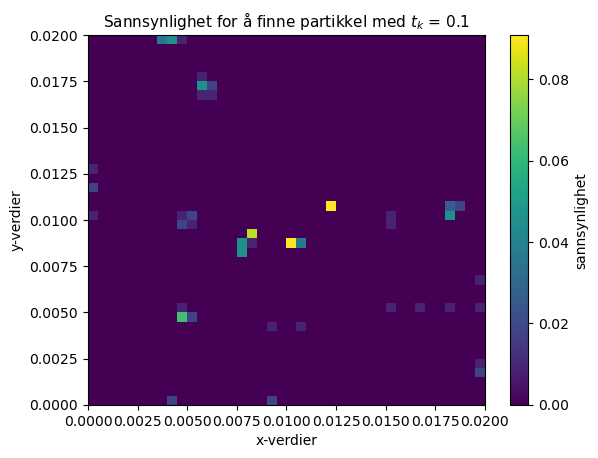

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#2e)
Tumor_konstant = 0.1
#Tar inn grenseverdiene, oppløsning (n_x,n_y), N virrevandrere og M tidssteg
def I_ij(x_min, x_max, y_min, y_max, n_x, n_y, N, M, plot = True): 
    x_tot, y_tot = Virrevandrer_i_tumor(x,y,Areal,Antall_tumorer,koordinater_tumor_sentrum,Tumor_konstant, M, False)
    for i in range(N-1):
        x_arr, y_arr = Virrevandrer_i_tumor(x,y,Areal,Antall_tumorer,koordinater_tumor_sentrum,Tumor_konstant, M, False)
        x_tot = np.append(x_tot, x_arr) #Lager array med alle x-verdier for alle partikler
        y_tot = np.append(y_tot, y_arr) #Lager array med alle y-verdier for alle partikler
    I, x_edges, y_edges = np.histogram2d(x_tot, y_tot, bins=(n_x,n_y)) 
    I = I/(M*N)  #Normaliserer
    I = np.transpose(I)
    
    if (plot == True):
        plt.imshow(I,extent= [x_min,x_max,y_min,y_max], interpolation='nearest',aspect='auto')
        plt.xlabel("x-verdier")
        plt.ylabel("y-verdier")
        plt.title(fr"Sannsynlighet for å finne partikkel med $t_k$ = {np.round(Tumor_konstant,2)}", fontsize = 11)
        plt.colorbar(label = 'sannsynlighet')
        plt.show()
    
    return I
    
    
I_ij(0, L, 0, L, 40, 40,10,10) #Kjører funksjon og plott





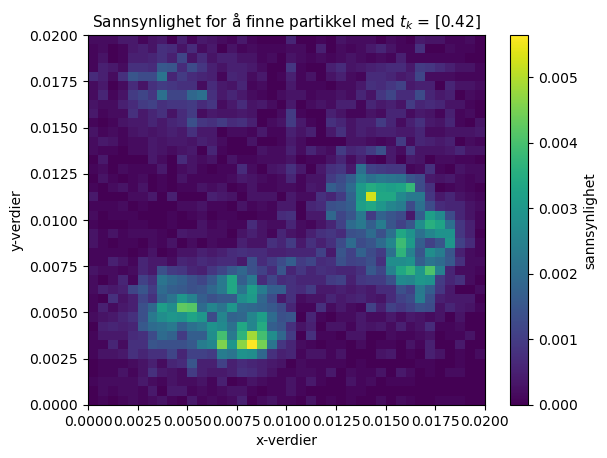

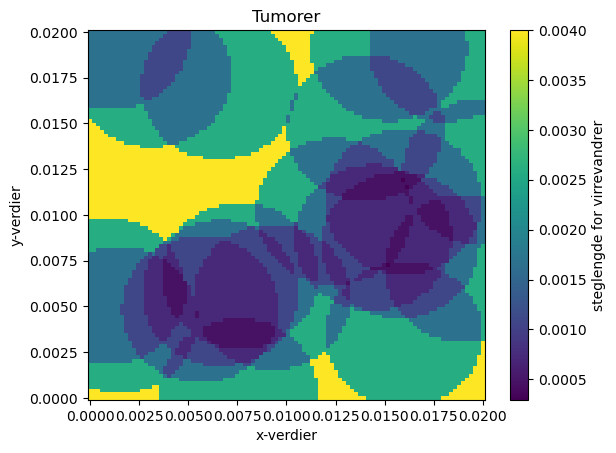

In [ ]:
#2f)
#Definerer konstanter som skal bli brukt
Tumor_konstant = np.random.uniform(0.3,0.45, 1) #Tumorkonstant innenfor intervallet (0.3,0.45)
M = 100 #Antall tidssteg
N = 100 #Anttall partikler
n_x = 40 #Oppløsning x-retning
n_y = 40 #Oppløsning y-retning
L = 0.02 #Lengde på plot
L_x = 0.02 #Lengde x-retning på I(i,j)
L_y = 0.02 #Lengde y-retning på I(i,j)
Antall_tumorer = 20
Areal = (np.pi)*delta_x**2 #Areal til hver tumor

#Må lage nye tumorsentrum for å endre på antallet tumorer, for å unngå indekseringsfeil i "lag_bilde_av_tumor"
x_pos, y_pos = generate_koordinates(0,L,0,L,Antall_tumorer)
koordinater_tumor_sentrum=[x_pos,y_pos]
#Lager koordinat-systemene som tas inn i funksjonen "lag_bilde_av_tumor" slik at aksene blir riktig ved endring av L
x=np.linspace(0,L,Oppløsning)
y=np.linspace(0,L,Oppløsning)

I_ij(0, L_x, 0, L_y, n_x, n_y, N, M) #Plotter sannsynligheten for å finne virrevandrer
lag_bilde_av_tumor(x,y,Areal,Antall_tumorer,koordinater_tumor_sentrum,Tumor_konstant) #Plotter tumorene


Ser at $I(i,j)$ er større der vi har en tett samling av tumorene. Jo større $N$ og $M$ er, jo lengre tid vil virrevandrerne være i tumorene i forhold til resten av vevet, siden diffusjonen i tumorene er mindre. Da vil $I(i,j)$ bli veldig stor i tumorene kontra i det friske vevet, dermed blir det lett å se hvor tumorene er og størrelsen. Hvis tumoren er veldig liten kan den være vanskelig å oppdage da virrevandrerne lett kommer seg ut av tumoren uten å bruke for mye tid der. Hvis tumoren er stor er den lettere å oppdage, da virrevandrer vil bruke lang tid på å komme ut av tumoren. Når man endrer på $L$, $L_x$ og $L_y$ vil plottet bli mindre, og en større konsentrasjon av tumorer på ett lite areal, så fremt at tumorene er av samme størrelse. Dette gjør at en liten boks $L\times L$ vil være mer hensiktsmessig for å finne små tumorer. Men har igjen ett problem med at diffusjonen ikke blir like tilfeldig, da den vil treffe de harde veggene å sprette inn igjen. Dette gjør at $I(i,j)$ blir større en den egentlig skal være i kantene. $L$ kan heller ikke være for stor da fåtallet av virrevandrerne vil treffe en tumor, og resten av virrevandrerne vil bare diffundere i friskt vev. 

Starposisjonen til partiklene er også satt til en tilfeldig posisjon $(x_0,y_0)$ i koordinatsystemet istedet for å starte i $\left(\frac{L}{2},\frac{L}{2}\right)$. Hvis alle partiklene hadde startet i sentrum ville $I(i,j)$ blitt unaturlig stor i sentrum, så man kunne tenkt seg at det var en tumor der selv om det egentlig ikke er det.

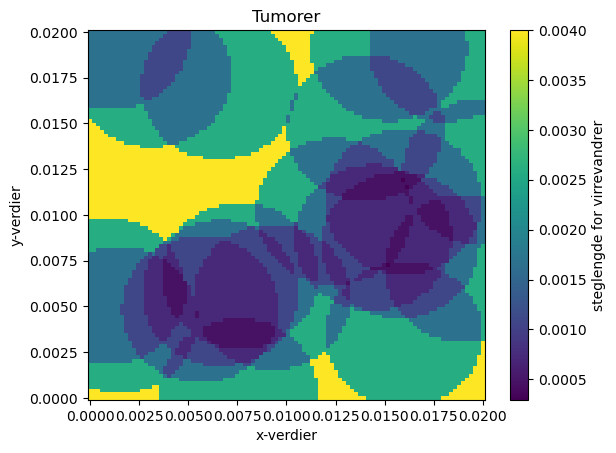

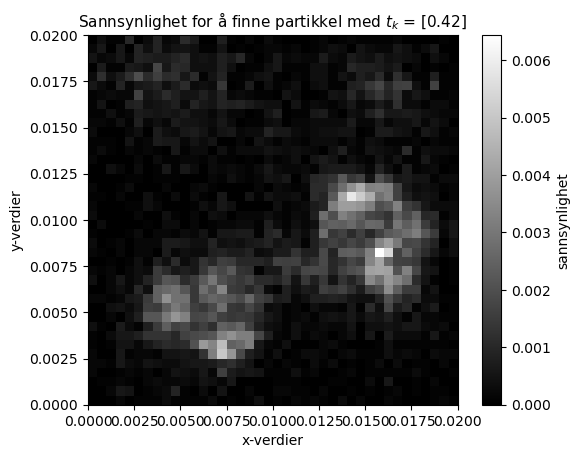

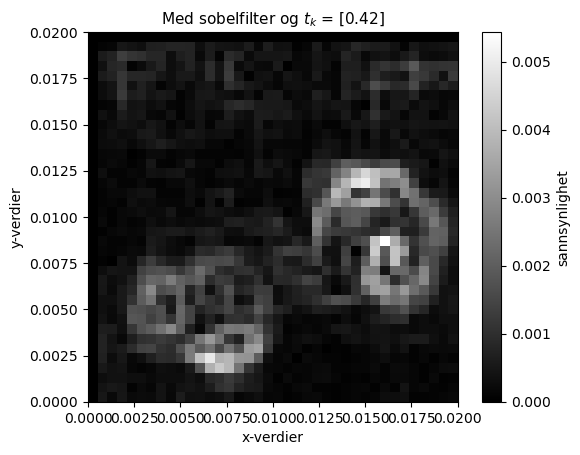

In [ ]:
#2g)
def sobel_filter():
    I = I_ij(0, L_x, 0, L_y, n_x, n_y, 100, 100, False) #Tar inn matrisen med 100 partikler og 100 steg, og setter plot = False
    g_x = np.matrix([[1,0,-1],[2,0,-2],[1,0,-1]]) #Lager matrise av g_x
    g_y = np.matrix([[1,2,1],[0,0,0],[-1,-2,-1]]) #Lager matrise av g_y
    X = np.zeros((n_x-2,n_y-2))
    Y = np.zeros((n_x-2,n_y-2))
    S = np.zeros((n_x-2,n_y-2))
    for i in range(2, n_x-1):
        for j in range(2, n_y-1): 
            #Finner de lokale pikslene rundt ett punkt I[i][j]
            lokale_piksler = np.matrix([[I[i-1][j-1],I[i-1][j],I[i-1][j+1]], [I[i][j-1],I[i][j],I[i][j+1]], [I[i+1][j-1],I[i+1][j],I[i+1][j+1]]])
            X[i-1][j-1] = np.sum(np.multiply(g_x,lokale_piksler))
            Y[i-1][j-1] = np.sum(np.multiply(g_y,lokale_piksler))
            S[i-1][j-1] = np.sqrt(X[i-1][j-1]**2+Y[i-1][j-1]**2)
    X = X/np.sum(X) #Normaliserer
    Y = Y/np.sum(Y) #Normaliserer
    S = S/np.sum(S) #Normaliserer
    return I, S
    
I, S = sobel_filter()

#Plotter tumorer
lag_bilde_av_tumor(x,y,Areal,Antall_tumorer,koordinater_tumor_sentrum,Tumor_konstant)
#Plotter I
plt.imshow(I,extent= [0,L,0,L], cmap = 'gray')
plt.xlabel("x-verdier")
plt.ylabel("y-verdier")
plt.title(fr"Sannsynlighet for å finne partikkel med $t_k$ = {np.round(Tumor_konstant,2)}", fontsize = 11)
plt.colorbar(label = 'sannsynlighet')
plt.show()
#Plotter S
plt.imshow(S,extent= [0,L,0,L], cmap = 'gray')
plt.xlabel("x-verdier")
plt.ylabel("y-verdier")
plt.title(fr"Med sobelfilter og $t_k$ = {np.round(Tumor_konstant,2)}", fontsize = 11)
plt.colorbar(label = 'sannsynlighet')
plt.show()

